In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [288]:
# Load training data
df = pd.read_csv("C:/Users/user/OneDrive - Bar-Ilan University - Students/Documents/Data_mining/Final_Project/hotels_train.csv")

In [7]:
print("Shape: ", df.shape)
df.head()

Shape:  (27213, 18)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [9]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


In [10]:
for col in df.columns:
    print(col, ': ', df[col].unique())

ID :  ['INN09588' 'INN07691' 'INN32192' ... 'INN22554' 'INN33957' 'INN31744']
weekend_nights :  [1 0 2 3 4 5 6 7]
week_nights :  [ 5  3  2  4  1  0  7  6 12 10  8  9 15 11 13 14 16 17]
room_type :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']
board_type :  ['half board' nan 'full board' 'breakfast' 'not selected']
n_adults :  [2 1 3 0 4]
n_less_12 :  [0 1 2 3 6]
n_more_12 :  [0 1 2 3 4]
booked_tour :  [0 1]
n_requests :  [2 0 1 3 5 4]
lead_time :  [ 34. 365. 148. 502.  32. 414. 168.  92.   9. 180. 309.   6.  23.  39.
 102.  27. 111.  50. 129.  75. 232. 335. 280. 178. 124.  93.  54. 266.
 137.  83.  64.   5.   2. 130. 336.  40.   4. 101. 108.  20.  17. 113.
  10. 138. 328.  69.  45.  98.  18. 147.   0. 256.  12. 321. 260.  36.
  42. 318. 114.  62.   3. 144. 387. 172. 231. 298.  33.  29. 122.  nan
 297.  14.  52. 226.  81.  35. 351. 230.  90. 362. 149.  68. 162. 245.
 216.  26. 106. 195.  15. 134. 363.  94. 332.  57.  58.  38. 141. 

In [11]:
numeric_col = df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price', 'is_canceled'],
      dtype='object')

In [12]:
nominal_data = df.drop(numeric_col, axis=1)
nominal_data

,ID,room_type,board_type,purchase_type,date
0,INN09588,Room_Type 1,half board,Online,11/28/2018
1,INN07691,Room_Type 1,NaN,NaN,11/03/2018
2,INN32192,Room_Type 4,half board,Online,05/06/2018
3,INN32218,Room_Type 1,NaN,Offline,9/26/2018
4,INN02994,Room_Type 4,half board,Offline,10/19/2017
...,...,...,...,...,...
27208,INN09056,Room_Type 1,NaN,NaN,7/18/2018
27209,INN24796,Room_Type 1,half board,Online,2/24/2018
27210,INN22554,Room_Type 1,NaN,Offline,4/15/2018
27211,INN33957,Room_Type 4,half board,Aviation,5/22/2018


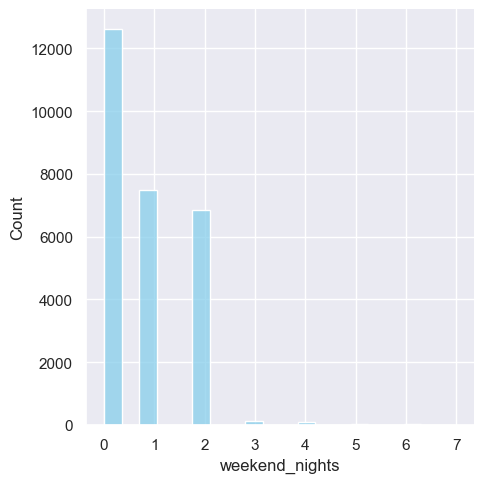

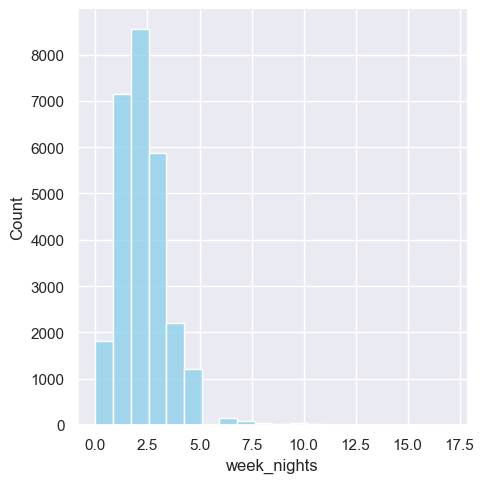

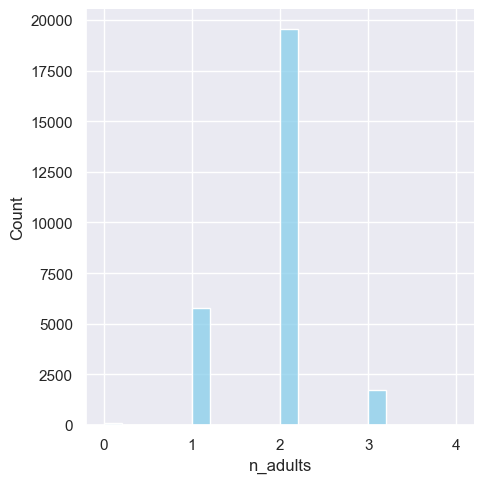

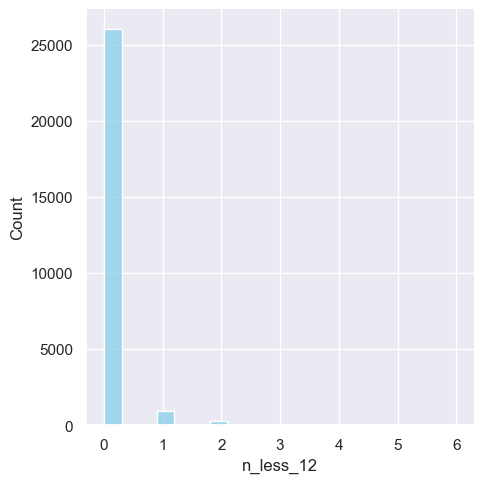

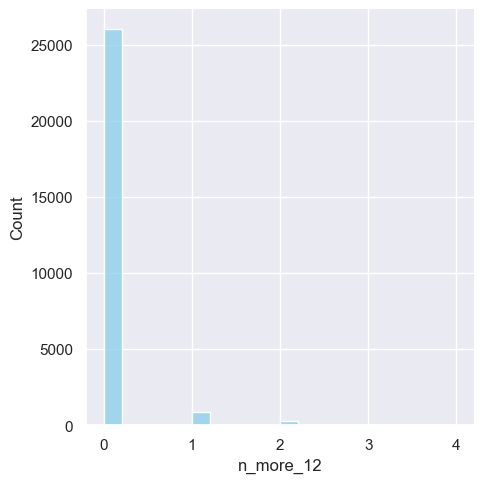

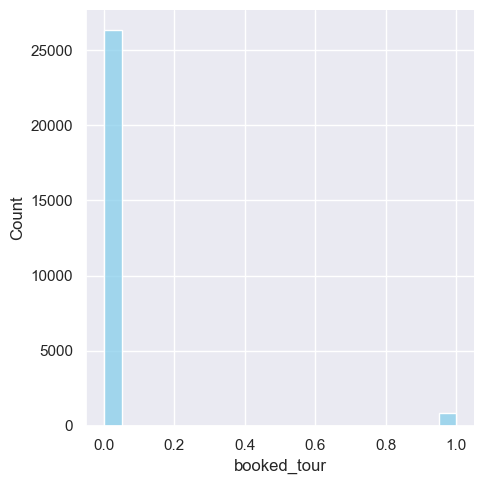

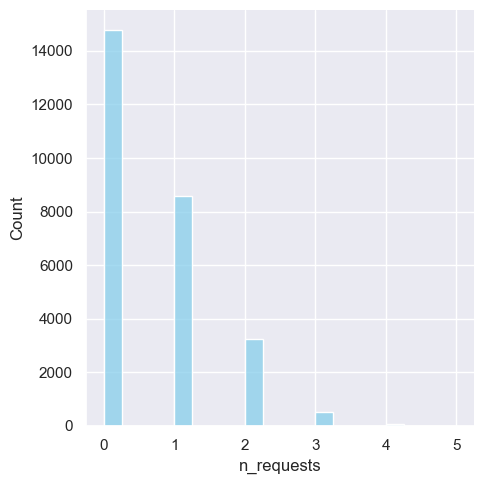

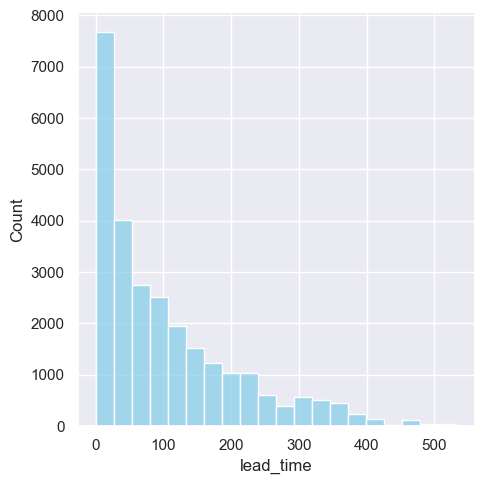

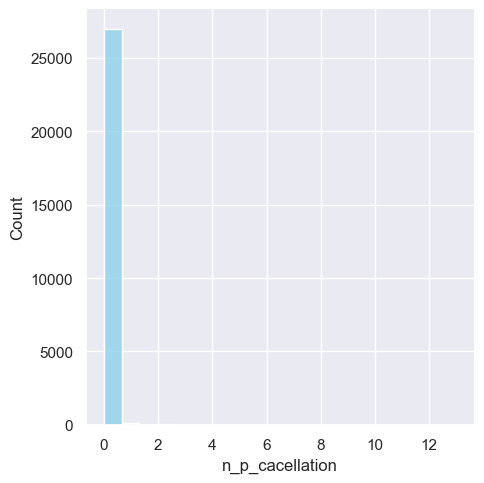

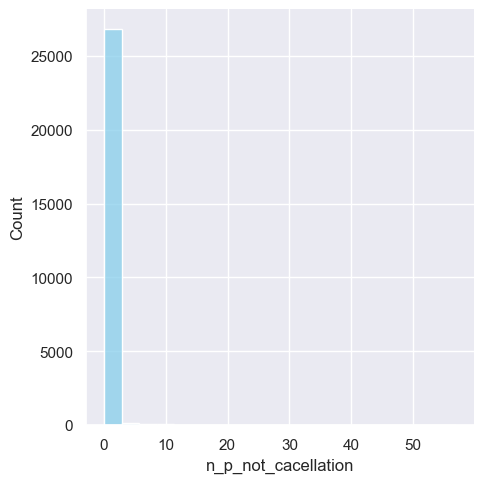

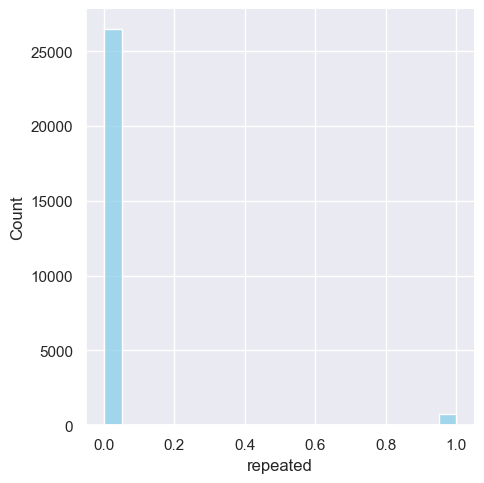

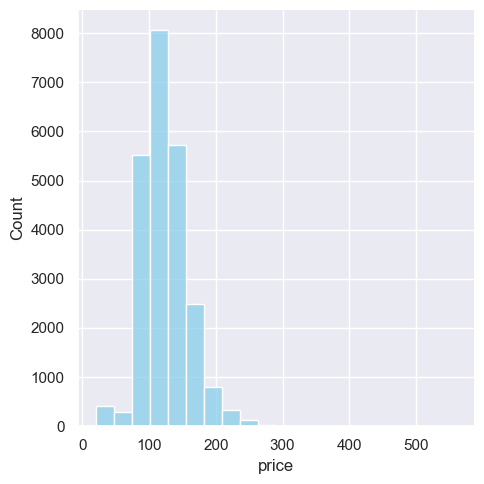

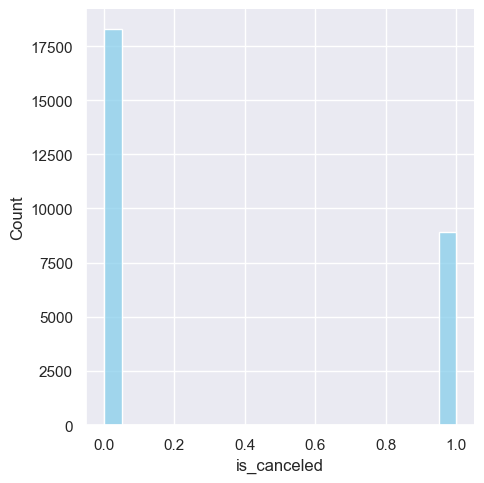

In [13]:
for col in numeric_col:
    sns.displot(df[col], bins=20, color='skyblue')

In [287]:
data = df
invalid_date_rows = data[data['date'] == '2018-2-29']
data['date'] = df['date'].replace('2018-2-29','02/28/2018')
data['date'].unique()


data['date']= pd.to_datetime(data['date'], format='%m/%d/%Y',errors='coerce')
data['date'].dtype

df['month'] = data['date'].dt.month
df['day'] = data['date'].dt.day
df['year'] = data['date'].dt.year
data

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,2018-11-28,0,11.0,28.0,2018.0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,...,NaN,0,0,0,NaN,2018-11-03,1,11.0,3.0,2018.0
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,2018-05-06,0,5.0,6.0,2018.0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,127.0,2018-09-26,1,9.0,26.0,2018.0
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,2017-10-19,0,10.0,19.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,Room_Type 1,NaN,3,0,0,0,1,...,NaN,0,0,0,NaN,2018-07-18,0,7.0,18.0,2018.0
27209,INN24796,0,4,Room_Type 1,half board,2,0,0,0,1,...,Online,0,0,0,113.0,2018-02-24,0,2.0,24.0,2018.0
27210,INN22554,0,2,Room_Type 1,NaN,2,0,0,0,0,...,Offline,0,0,0,105.0,2018-04-15,1,4.0,15.0,2018.0
27211,INN33957,1,0,Room_Type 4,half board,1,0,0,0,0,...,Aviation,0,0,0,130.0,2018-05-22,1,5.0,22.0,2018.0


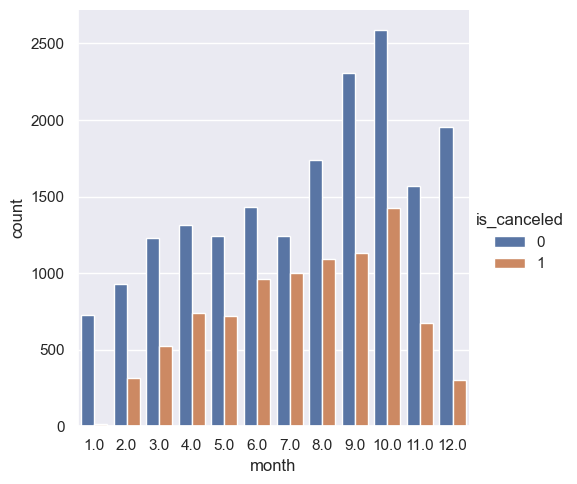

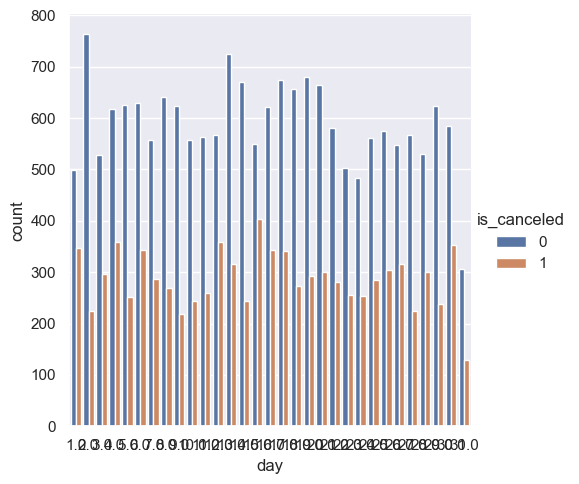

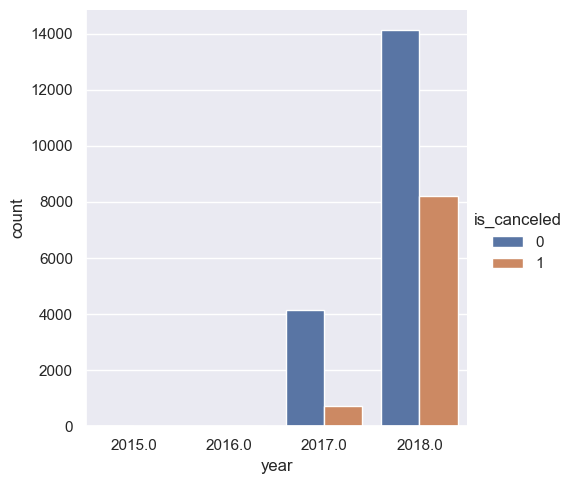

In [283]:
sns.catplot(x = 'month', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'day', kind = 'count', hue = 'is_canceled', data = data)
sns.catplot(x = 'year', kind = 'count', hue = 'is_canceled', data = data)

In [143]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  object        
 4   board_type           19045 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            26794 non-null  float64       
 11  purchase_type        22366 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,...,room_type_cat,board_type_cat,purchase_type_cat,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel,price_min_max,lead_time_norm
weekend_nights,1.000000,0.172582,0.106355,0.019048,0.020736,-0.033336,0.060688,0.044996,-0.023784,-0.029500,...,0.060986,0.028703,0.104041,0.025048,0.026517,0.060986,-0.029217,-0.108361,0.001015,0.044996
week_nights,0.172582,1.000000,0.105197,0.009291,0.020412,-0.052188,0.046046,0.146319,-0.027565,-0.048246,...,0.093326,0.047673,0.087866,0.115574,0.019829,0.093326,-0.048271,-0.093498,0.024101,0.146319
n_adults,0.106355,0.105197,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.093805,-0.046387,-0.124772,...,0.270896,-0.020067,0.262752,0.061146,-0.019042,0.270896,0.019942,-0.254239,0.277562,0.093805
n_less_12,0.019048,0.009291,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.038129,-0.012620,-0.015822,...,0.276393,0.029224,0.081397,-0.037015,0.747540,0.276393,-0.029419,-0.077025,0.245546,-0.038129
n_more_12,0.020736,0.020412,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.032217,-0.012587,-0.017378,...,0.278152,0.036108,0.085143,-0.033733,0.753068,0.278152,-0.036294,-0.080617,0.241999,-0.032217
booked_tour,-0.033336,-0.052188,0.009166,0.036395,0.020203,1.000000,0.091335,-0.061681,0.021167,0.068105,...,0.039589,0.023650,-0.008619,-0.052245,0.037665,0.039589,-0.022512,0.011290,0.052482,-0.061681
n_requests,0.060688,0.046046,0.188380,0.094793,0.099084,0.091335,1.000000,-0.097606,0.000753,0.030748,...,0.145410,0.036642,0.251138,-0.096399,0.129210,0.145410,-0.036922,-0.232603,0.169646,-0.097606
lead_time,0.044996,0.146319,0.093805,-0.038129,-0.032217,-0.061681,-0.097606,1.000000,-0.046393,-0.077467,...,-0.104993,-0.106886,-0.005186,0.958666,-0.046859,-0.104993,0.106078,-0.002071,-0.061771,1.000000
n_p_cacellation,-0.023784,-0.027565,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.046393,1.000000,0.473422,...,-0.006050,0.016065,-0.068807,-0.030736,-0.016797,-0.006050,-0.016118,0.071923,-0.055666,-0.046393
n_p_not_cacellation,-0.029500,-0.048246,-0.124772,-0.015822,-0.017378,0.068105,0.030748,-0.077467,0.473422,1.000000,...,-0.009804,0.029815,-0.183824,-0.054169,-0.022129,-0.009804,-0.029882,0.194387,-0.103550,-0.077467


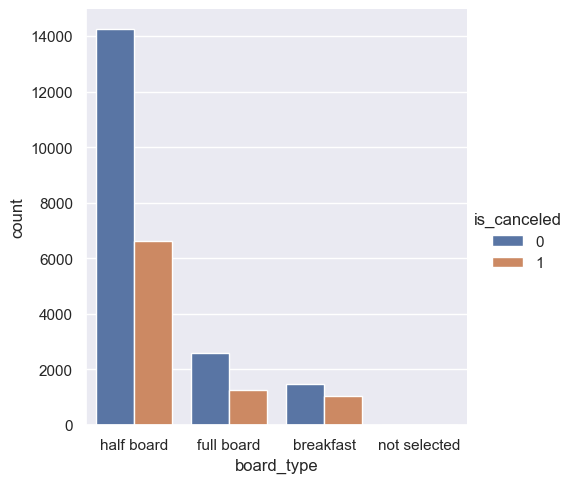

In [145]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

df['room_type_cat'] = df['room_type'].astype('category').cat.codes
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes
df[df.describe().columns].corr(method = 'pearson')

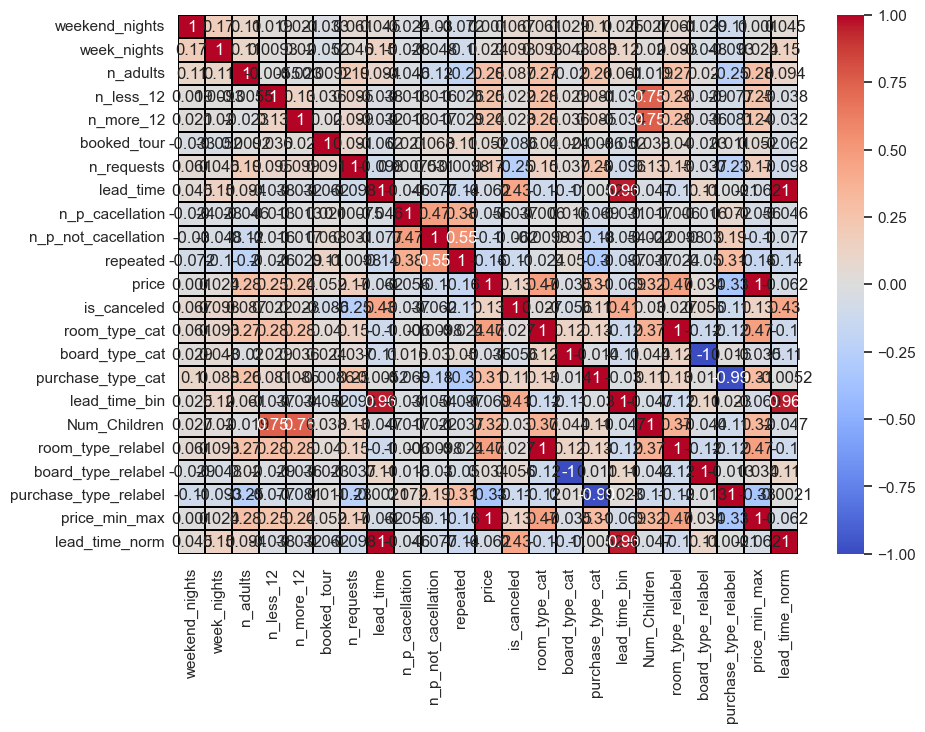

In [146]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')
# dont take correlation with target

In [147]:
s = df.board_type.value_counts(normalize=True)
print(s)
missing = df['board_type'].isnull()
df.loc[missing,'board_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
print(df)

half board      0.766619
full board      0.141366
breakfast       0.091831
not selected    0.000184
Name: board_type, dtype: float64
             ID  weekend_nights  week_nights    room_type  board_type  \
0      INN09588               1            5  Room_Type 1  half board   
1      INN07691               0            3  Room_Type 1  half board   
2      INN32192               0            2  Room_Type 4  half board   
3      INN32218               1            2  Room_Type 1  half board   
4      INN02994               1            3  Room_Type 4  half board   
...         ...             ...          ...          ...         ...   
27208  INN09056               1            2  Room_Type 1  half board   
27209  INN24796               0            4  Room_Type 1  half board   
27210  INN22554               0            2  Room_Type 1  half board   
27211  INN33957               1            0  Room_Type 4  half board   
27212  INN31744               0            2  Room_Type 1   brea

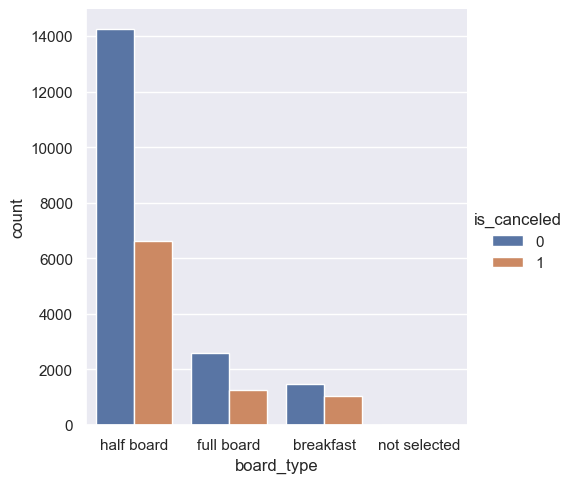

In [148]:
sns.catplot(x = 'board_type', kind = 'count', hue = 'is_canceled', data = df)

In [149]:
df.lead_time

0         34.0
1        365.0
2        148.0
3        502.0
4         32.0
         ...  
27208    106.0
27209     18.0
27210    147.0
27211      3.0
27212    328.0
Name: lead_time, Length: 27213, dtype: float64

0.0      0.036710
2.0      0.029986
3.0      0.017822
5.0      0.017051
4.0      0.016977
           ...   
354.0    0.000037
390.0    0.000037
389.0    0.000037
400.0    0.000037
410.0    0.000037
Name: lead_time, Length: 350, dtype: float64


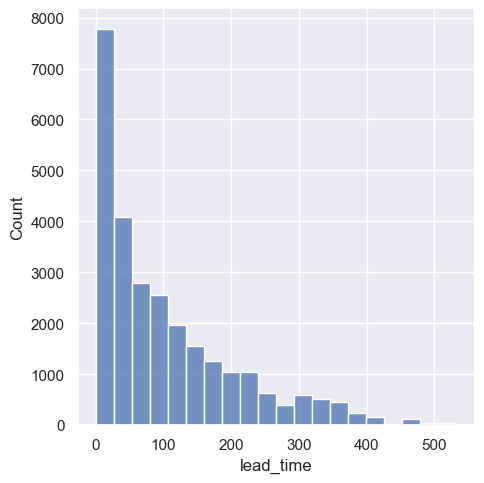

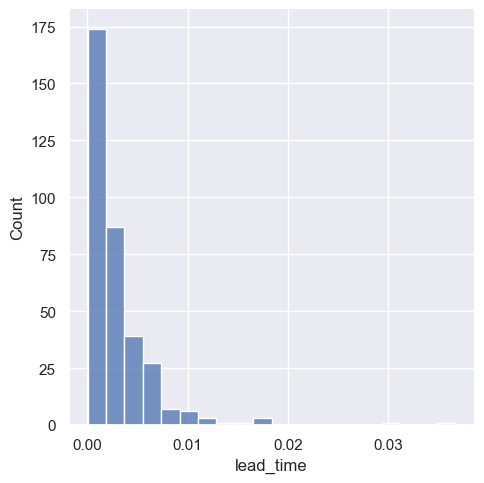

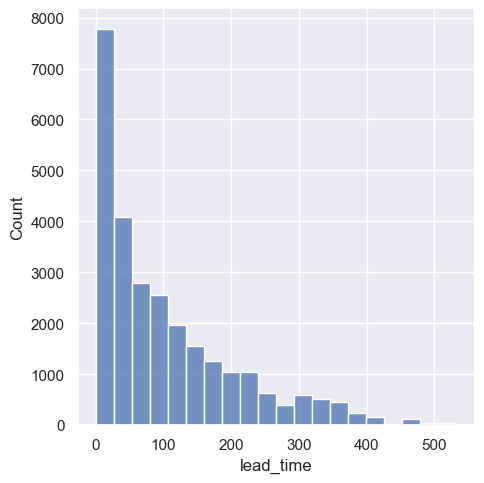

In [150]:
# correlations dont appear to be significant enough so we will fill lead_time in with mean.
s = df.lead_time.value_counts(normalize=True)
print(s)
sns.displot(df['lead_time'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['lead_time'].isnull()
df.loc[missing,'lead_time'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['lead_time'], bins = 20)

In [151]:
df['purchase_type'].unique()

array(['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

Online           0.640319
Offline          0.290192
Corporate        0.055231
Complementary    0.010914
Aviation         0.003344
Name: purchase_type, dtype: float64


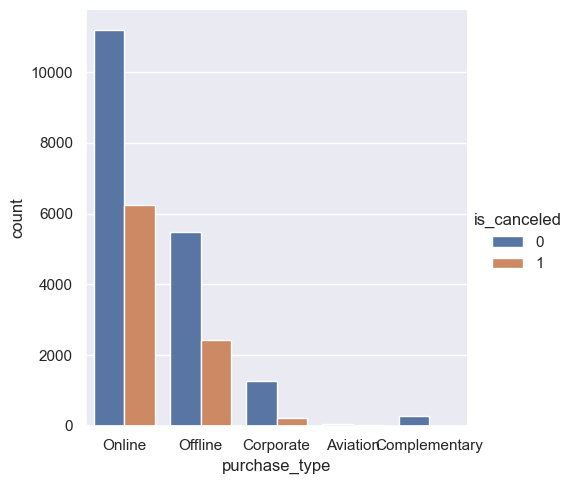

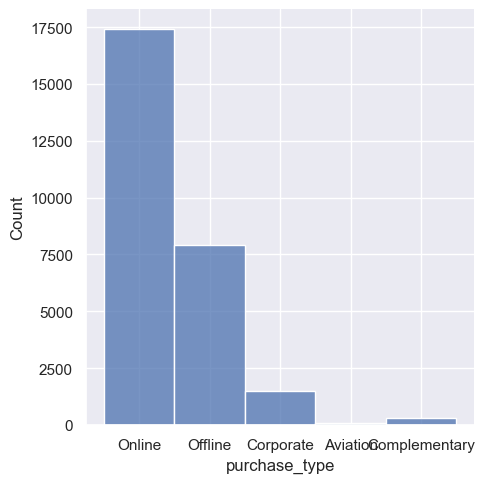

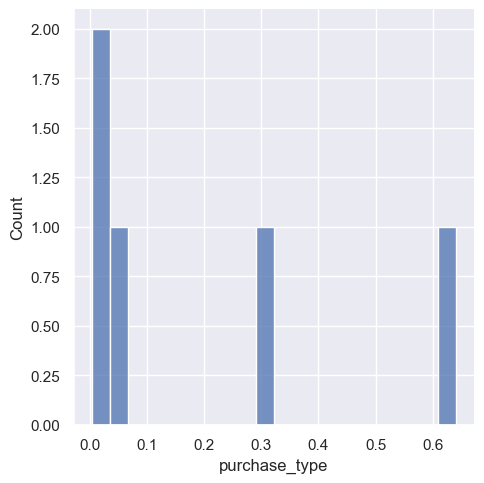

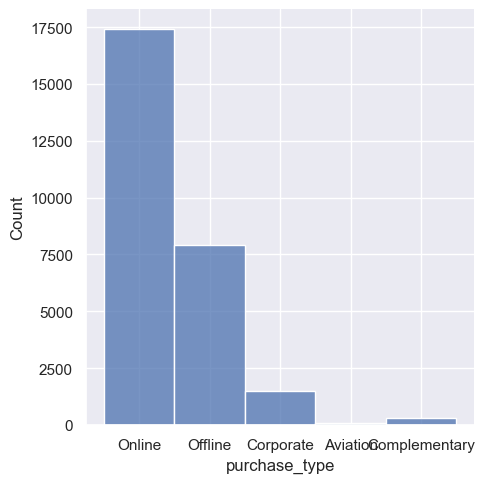

In [152]:
sns.catplot(x = 'purchase_type', kind = 'count', hue = 'is_canceled', data = df)
s = df.purchase_type.value_counts(normalize=True)
print(s)
sns.displot(df['purchase_type'], bins = 20)
sns.displot(s, bins = 20)
# sns.displot(df[col], bins=20, color='skyblue')
missing = df['purchase_type'].isnull()
df.loc[missing,'purchase_type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
sns.displot(df['purchase_type'], bins = 20)

For class  Room_Type 1  the median is  114.5
For class  Room_Type 1  the mean is  115.99780146942356
and the number of missing values is  0 out of  21084 rows
For class  Room_Type 2  the median is  106.25
For class  Room_Type 2  the mean is  109.59325007064375
and the number of missing values is  0 out of  511 rows
For class  Room_Type 3  the median is  100.75
For class  Room_Type 3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  Room_Type 4  the median is  147.0
For class  Room_Type 4  the mean is  145.31422182108753
and the number of missing values is  0 out of  4571 rows
For class  Room_Type 5  the median is  139.9
For class  Room_Type 5  the mean is  143.5586279272016
and the number of missing values is  0 out of  180 rows
For class  Room_Type 6  the median is  197.5
For class  Room_Type 6  the mean is  199.00527663684372
and the number of missing values is  0 out of  741 rows
For class  Room_Type 7  the median is  211.9
For class  

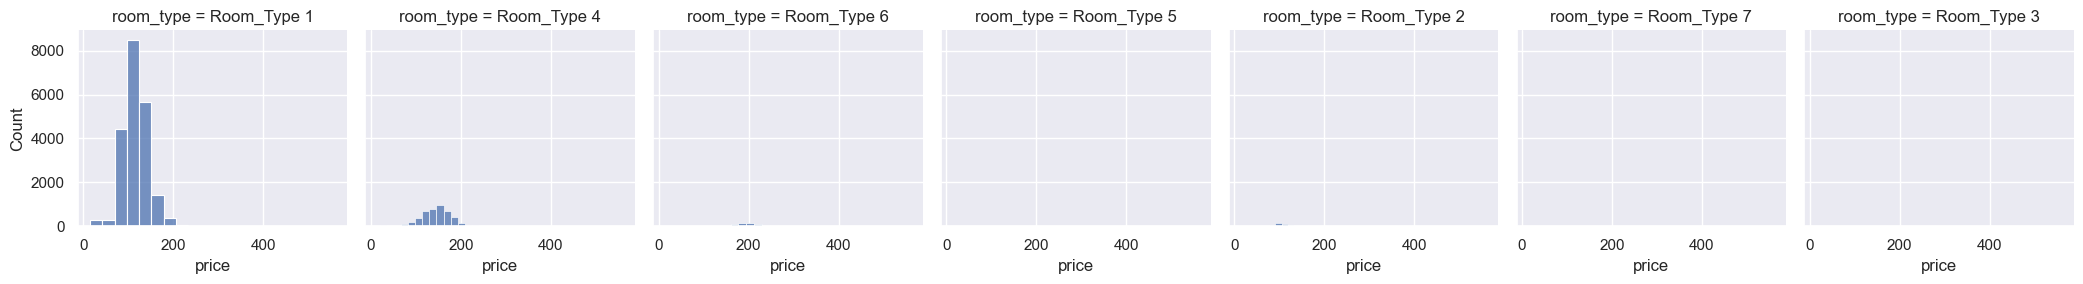

In [153]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows')
    
  
for room in df.room_type.unique():
    mu = df.loc[df['room_type']==room, 'price'].mean()
    sigma = df.loc[df['room_type']==room , 'price'].std()
    room_data = df['room_type']==room
    missing_price = df['price'].isnull()
    df.loc[missing_price & room_data, 'price'] = np.random.normal(mu, sigma, len(df[missing_price & room_data]))



218.900000    31
227.900000    27
197.300000    22
173.000000    22
206.300000    18
              ..
217.071253     1
170.070000     1
111.551746     1
223.760000     1
244.330000     1
Name: price, Length: 400, dtype: int64

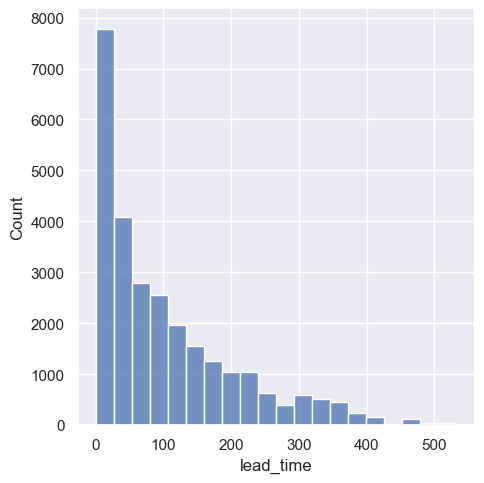

In [154]:
sns.displot(df['lead_time'],  bins = 20)
df[df['room_type']=='Room_Type 6'].price.value_counts()

min_value: 0.0
max_value: 532.0
[  0.         177.33333333 354.66666667 532.        ]


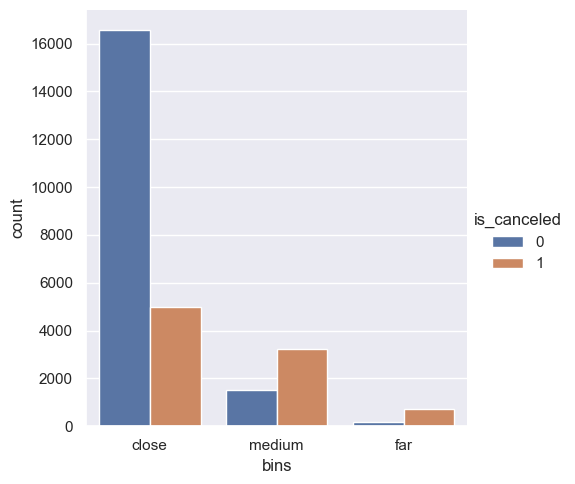

In [155]:
df.lead_time.unique()
min_value = df['lead_time'].min()
max_value = df['lead_time'].max()
print(f'min_value: {min_value}')
print(f'max_value: {max_value}')
bins = np.linspace(min_value, max_value, 4)
print(bins)
labels = ['close', 'medium', 'far']
df['bins'] = pd.cut(df['lead_time'], bins=bins, labels=labels, 
                    include_lowest=True)
sns.catplot(x = 'bins', kind = 'count', hue = 'is_canceled', data = df)

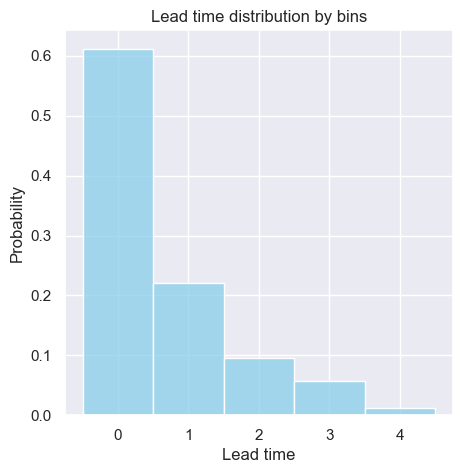

In [156]:
bins = [0, 100, 200, 300, 400, float('inf')]
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=False, include_lowest=True)

df['lead_time_bin'].value_counts().sort_index()

sns.histplot(data=df, x='lead_time_bin', color='skyblue', stat="probability", discrete=True)
plt.title('Lead time distribution by bins')
plt.xlabel('Lead time')
plt.ylabel('Probability')
plt.show()

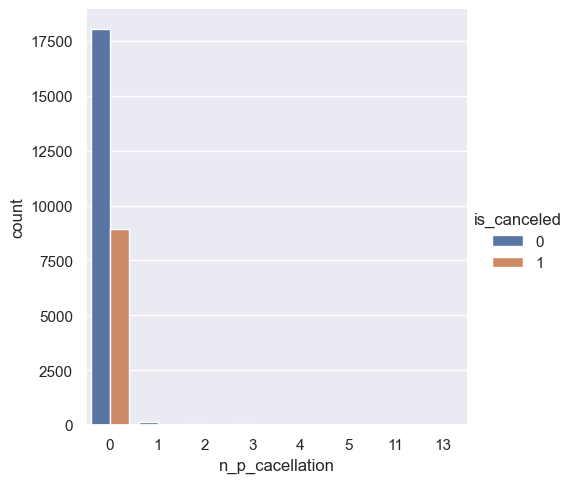

In [157]:
sns.catplot(x = 'n_p_cacellation', kind = 'count', hue = 'is_canceled', data = df)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     27213 non-null  object  
 1   weekend_nights         27213 non-null  int64   
 2   week_nights            27213 non-null  int64   
 3   room_type              27213 non-null  object  
 4   board_type             27213 non-null  object  
 5   n_adults               27213 non-null  int64   
 6   n_less_12              27213 non-null  int64   
 7   n_more_12              27213 non-null  int64   
 8   booked_tour            27213 non-null  int64   
 9   n_requests             27213 non-null  int64   
 10  lead_time              27213 non-null  float64 
 11  purchase_type          27213 non-null  object  
 12  n_p_cacellation        27213 non-null  int64   
 13  n_p_not_cacellation    27213 non-null  int64   
 14  repeated               27213 non-null 

In [112]:
df['n_p_cacellation'].unique()

array([ 0,  1,  3,  2,  4, 11,  5, 13], dtype=int64)

In [113]:
df[df['weekend_nights']==6]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,board_type_cat,purchase_type_cat,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel,price_min_max,lead_time_norm
2879,INN27131,6,12,Room_Type 1,half board,1,0,0,0,1,...,2,4,close,0,0,1,1,1,0.096155,-0.975331
5236,INN02711,6,13,Room_Type 1,full board,2,0,0,0,0,...,1,4,close,0,0,1,2,1,0.138133,-0.251052
7579,INN00540,6,15,Room_Type 4,half board,1,0,0,0,0,...,2,4,close,0,0,4,1,1,0.243861,-0.849789
9577,INN14276,6,14,Room_Type 1,half board,1,0,0,0,0,...,2,4,close,0,0,1,1,1,0.138959,-0.656648
9659,INN02297,6,14,Room_Type 1,half board,1,0,0,0,0,...,2,4,close,0,0,1,1,1,0.187215,-0.791847
9916,INN32188,6,13,Room_Type 1,full board,2,0,0,0,0,...,1,4,close,1,0,1,2,1,0.195989,0.511856
14725,INN19746,6,16,Room_Type 4,half board,1,0,0,0,1,...,2,4,close,0,0,4,1,1,0.190391,-0.627677
16549,INN17939,6,15,Room_Type 1,half board,1,0,0,0,0,...,2,2,close,0,0,1,1,3,0.247422,-0.898074
20194,INN18161,6,12,Room_Type 1,half board,1,0,0,0,0,...,2,4,close,1,0,1,1,1,0.211751,0.193173
20377,INN35200,6,14,Room_Type 1,full board,1,0,0,0,1,...,1,4,close,0,0,1,2,1,0.147109,-0.946360


In [114]:
df['Num_Children'] = df['n_less_12'] + df['n_more_12']

In [115]:
df['Num_Children'].value_counts()

0     25168
1      1217
2       814
3        13
10        1
Name: Num_Children, dtype: int64

In [116]:
df[df['Num_Children']==10]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,board_type_cat,purchase_type_cat,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel,price_min_max,lead_time_norm
14485,INN06339,0,2,Room_Type 4,half board,2,6,4,0,1,...,2,4,close,0,10,4,1,1,0.266474,-0.560077


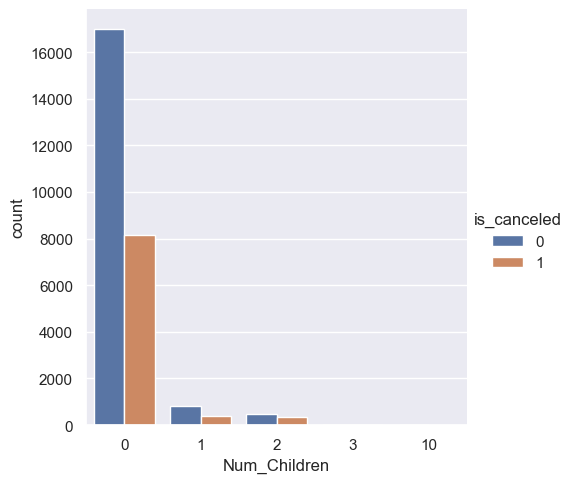

In [117]:
sns.catplot(x = 'Num_Children', kind = 'count', hue = 'is_canceled', data = df)

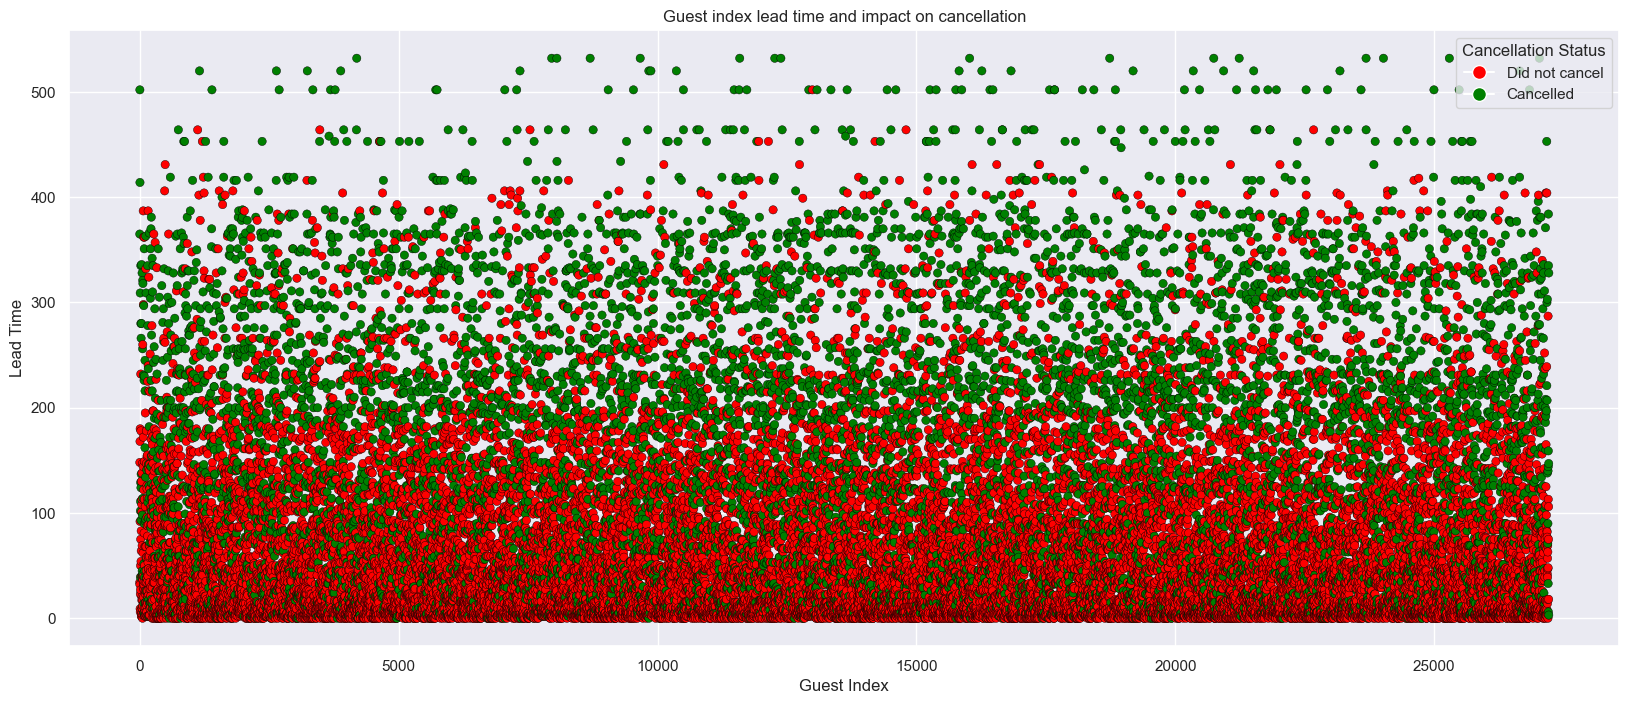

In [118]:
colordict = {0: 'red', 1: 'green'}
plt.figure(figsize=(20, 8))
scatter = plt.scatter(df.index, df['lead_time'], c=df['is_canceled'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('Guest index lead time and impact on cancellation')
plt.xlabel('Guest Index')
plt.ylabel('Lead Time')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Did not cancel',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Cancelled',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Cancellation Status', loc='upper right')
plt.show()

In [119]:

dict_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}

# Print the dictionary
print(dict_room)

# Remap the values of the dataframe
df['room_type_relabel'] = df['room_type'].map(dict_room)
df.room_type_relabel

dict_board = {'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}

# Print the dictionary
print(dict_board)

# Remap the values of the dataframe
df['board_type_relabel'] = df['board_type'].map(dict_board)
df.board_type_relabel

dict_purchase = {'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}

# Print the dictionary
print(dict_purchase)

# Remap the values of the dataframe
df['purchase_type_relabel'] = df['purchase_type'].map(dict_purchase)
df.purchase_type_relabel

{'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
{'half board': 1, 'full board': 2, 'breakfast': 3, 'not selected': 4}
{'Online': 1, 'Offline': 2, 'Corporate': 3, 'Aviation': 4, 'Complementary': 5}


0        1
1        1
2        1
3        2
4        2
        ..
27208    1
27209    1
27210    2
27211    4
27212    2
Name: purchase_type_relabel, Length: 27213, dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     27213 non-null  object  
 1   weekend_nights         27213 non-null  int64   
 2   week_nights            27213 non-null  int64   
 3   room_type              27213 non-null  object  
 4   board_type             27213 non-null  object  
 5   n_adults               27213 non-null  int64   
 6   n_less_12              27213 non-null  int64   
 7   n_more_12              27213 non-null  int64   
 8   booked_tour            27213 non-null  int64   
 9   n_requests             27213 non-null  int64   
 10  lead_time              27213 non-null  float64 
 11  purchase_type          27213 non-null  object  
 12  n_p_cacellation        27213 non-null  int64   
 13  n_p_not_cacellation    27213 non-null  int64   
 14  repeated               27213 non-null 

In [121]:
data_mean = df['price'].mean()
data_std = df['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,board_type_cat,purchase_type_cat,bins,lead_time_bin,Num_Children,room_type_relabel,board_type_relabel,purchase_type_relabel,price_min_max,lead_time_norm
13,INN15451,2,5,Room_Type 6,breakfast,2,1,1,0,0,...,0,4,close,0,2,6,3,1,0.428408,-0.618020
14,INN10191,1,3,Room_Type 6,half board,2,0,2,0,0,...,2,4,close,1,2,6,1,1,0.413962,-0.009625
98,INN21633,1,0,Room_Type 4,half board,3,0,0,0,1,...,2,4,close,0,0,4,1,1,0.478702,-0.965674
183,INN33956,1,2,Room_Type 4,half board,2,0,0,0,0,...,2,4,close,0,0,4,1,1,0.585348,-0.328308
214,INN13372,0,1,Room_Type 6,half board,2,0,2,0,0,...,2,4,close,0,2,6,1,1,0.451164,-0.849789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26586,INN14762,2,5,Room_Type 4,breakfast,3,0,0,0,2,...,0,4,close,1,0,4,3,1,0.398672,0.144888
26888,INN28220,0,2,Room_Type 4,breakfast,3,0,0,1,2,...,0,4,close,0,0,4,3,1,0.428408,-0.531106
26968,INN21342,2,1,Room_Type 6,half board,2,0,2,0,0,...,2,4,close,0,2,6,1,1,0.420570,-0.791847
26975,INN31304,0,3,Room_Type 7,half board,2,1,1,0,2,...,2,4,close,0,2,7,1,1,0.392614,-0.975331


In [122]:
import sklearn

[15.20618425]
[560.]


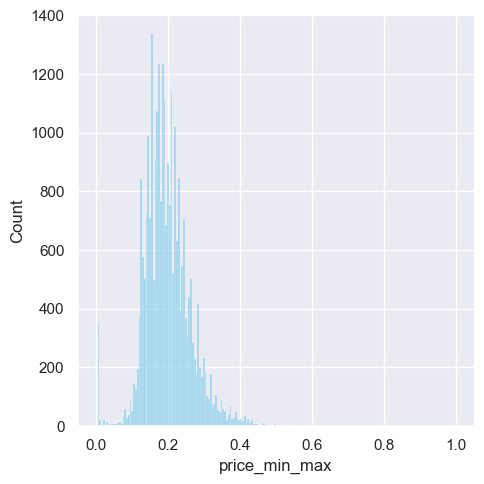

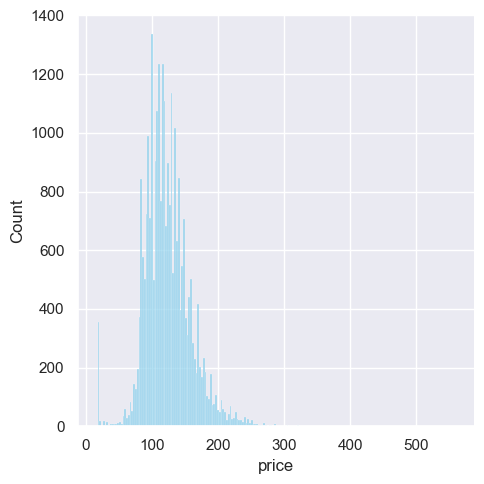

In [123]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['price']))
df['price_min_max'] = scaler.transform(pd.DataFrame(df['price']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['price','price_min_max']].head()

sns.displot(df['price_min_max'], color='skyblue')
sns.displot(df['price'], color='skyblue')

0   -0.666305
1    2.530181
2    0.434599
3    3.853198
4   -0.685619
Name: lead_time_norm, dtype: float64


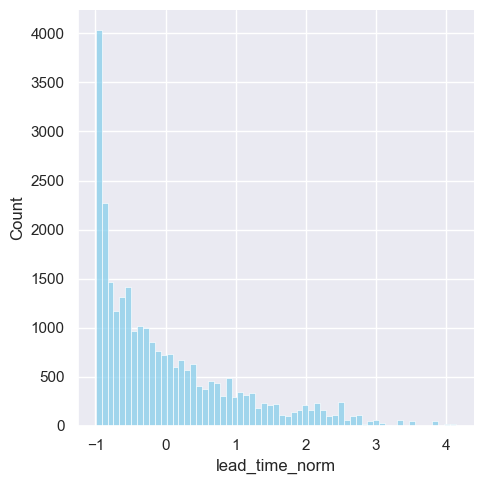

In [124]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['lead_time']))
df['lead_time_norm'] = z_scaler.transform(pd.DataFrame(df['lead_time']))
print(df['lead_time_norm'].head())
sns.displot(df['lead_time_norm'], color='skyblue')


In [162]:
df1 = df[['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time_norm', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price_min_max', 'room_type_relabel', 'board_type_relabel', 'purchase_type_relabel', 'month', 'day', 'year']]

In [163]:
df1.head()

,weekend_nights,week_nights,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time_norm,n_p_cacellation,n_p_not_cacellation,repeated,price_min_max,room_type_relabel,board_type_relabel,purchase_type_relabel,month,day,year
0,1,5,2,0,0,0,2,-0.666305,0,0,0,0.171063,1,1,1,11.0,28.0,2018.0
1,0,3,2,0,0,0,0,2.530181,0,0,0,0.195171,1,1,1,11.0,3.0,2018.0
2,0,2,1,0,0,0,1,0.434599,0,0,0,0.224110,4,1,1,5.0,6.0,2018.0
3,1,2,2,0,0,0,0,3.853198,0,0,0,0.205204,1,1,2,9.0,26.0,2018.0
4,1,3,2,0,1,0,2,-0.685619,0,0,0,0.173999,4,1,2,10.0,19.0,2017.0


In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='is_canceled')
df2 = pd.DataFrame(pca.transform(df1))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [137]:
pca.explained_variance_ratio_

array([0.28561419, 0.20636795, 0.17380708, 0.08692203, 0.06968997,
       0.05924457, 0.03792531, 0.03528972, 0.02021022, 0.00858323,
       0.0060786 , 0.00577685, 0.00280853, 0.00143188])

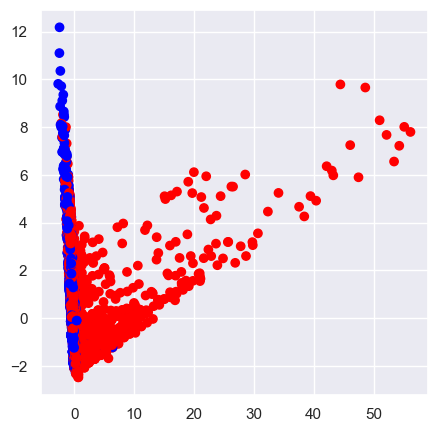

In [138]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df['is_canceled'].map(colordict))